# Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
warnings.simplefilter("ignore")


## SVM para Clasificación (SVC)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/drive/MyDrive/IA in geo/data.csv',index_col=0)
le=LabelEncoder()

In [4]:
data["cover"]=le.fit_transform(data["cover"])
data=data.sample(n = 380000)
X=data.drop(['class'],axis=1)
y=data['class']
print(X.shape)
print(y.shape)

(380000, 9)
(380000,)


In [5]:
  from imblearn.under_sampling import RandomUnderSampler
  rus=RandomUnderSampler(sampling_strategy=0.5)
  X,y=rus.fit_resample(X,y)
  print(X.shape)
  print(y.shape)

(2241, 9)
(2241,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='sigmoid' )
svc.fit(X_train,y_train)

SVC(kernel='sigmoid', probability=True)

In [8]:
y_pred=svc.predict(X_test)
print(y_pred[:100])
prediction_proba=svc.predict_proba(X_test)
print(prediction_proba[:10,:])

[1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0]
[[0.74429785 0.25570215]
 [0.5287781  0.4712219 ]
 [0.29413683 0.70586317]
 [0.57739859 0.42260141]
 [0.05993488 0.94006512]
 [0.7810451  0.2189549 ]
 [0.64265325 0.35734675]
 [0.5        0.5       ]
 [0.79979516 0.20020484]
 [0.63016548 0.36983452]]


In [9]:
print(svc.score(X_test,y_test))

0.46993318485523383


In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)
results = cross_val_score(svc, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.44695382891645014
0.03176249359905612


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       302
           1       0.14      0.12      0.13       147

    accuracy                           0.47       449
   macro avg       0.37      0.38      0.37       449
weighted avg       0.45      0.47      0.46       449



In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[193 109]
 [129  18]]


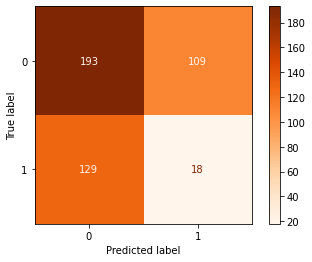

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")
plt.grid(False)

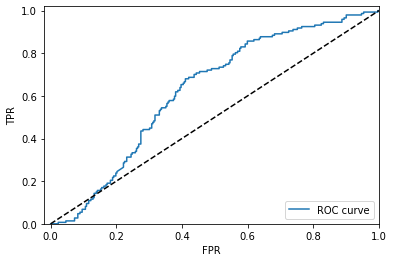

In [14]:
from sklearn.metrics import roc_curve
probs=svc.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

In [15]:
from sklearn.metrics import accuracy_score 
print('Precision para validacion:',accuracy_score(y_test,y_pred))

Precision para validacion: 0.46993318485523383


In [16]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Hiperparámetros

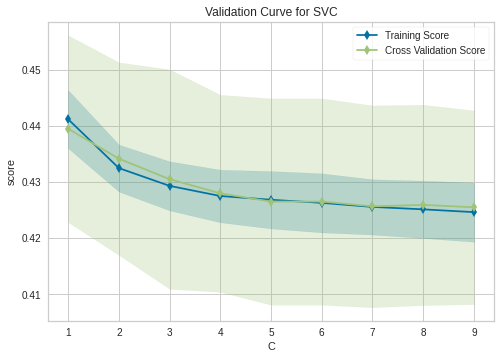

In [17]:
from yellowbrick.model_selection import ValidationCurve
c=np.arange(1,10)
k=ValidationCurve(svc,param_name='C', param_range=c, cv=4, scoring='f1_weighted',n_jobs=4)
k.fit(X_train,y_train)
k.show();

En los casos donde la función objetivo no es lineal, se utiliza la función no lineal (*Kernel trick*). A continuación se muestran dos ejemplos. El primero de ellos es el caso que veniamos trabajando de la base de datos Iris, utilizando una función no lineal de kernel *rbf*  y un gamma de 10. Para el segundo ejemplo se generará una base de datos.